# EDA of Penguin Dataset

In [173]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
# loading the dataset
# dataset src: https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_lter.csv
df = pd.read_csv('penguins_lter.csv')

In [175]:
# inspecting the first five data points
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [176]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [177]:
df.shape

(344, 17)

**Observation**

Here, dataset's shape is **(344, 7)** meaning that 7 features and 344 rows are present. 

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

## Data Cleaning
Finding missing values, removing duplicates, etc. are crucial step in EDA. These values could lead our models to draw incorrect conclusions at the end. 

Investigating only isnull() is not enough, for instance, in a dataset containing a feature of heart rate, the value of that feature cannot be zero. In this case zero is also a missing value and needs to be dealt with.

There are various ways to deal with the missing values of the data such as deleting the rows containing missing values (if the dataset is large enough).

For small dataset **imputation methods**(mean/median of feature) etc.

In [179]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Since, 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
features have missing values we choose to impute the missing values.

But, most of the 'Comments' feature has missing value we omit can this column/feature.

In [180]:
cols = df.columns[df.isnull().sum() != 0]

In [181]:
cols

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'Comments'],
      dtype='object')

In this prject we only handle missing value or null value of features: 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',

### Handling missing/null values of sex column

In [182]:
df.value_counts(['Sex'])

Sex   
MALE      168
FEMALE    165
.           1
dtype: int64

In [183]:
df['Sex'] = df['Sex'].fillna('MALE')

In [184]:
df['Sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: Sex, dtype: int64

In [185]:
df[df['Sex'] == '.']

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
336,PAL0910,117,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N36A1,Yes,12/1/09,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444,NaN


Since the index 336 contains value '.' in 'Sex' feature so we drop this row.

In [186]:
df.drop(axis=0, inplace=True, index=336)

### Handling missing/null values of 'Body Mass (g)' column

In [187]:
df[df['Body Mass (g)'].isna()]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,MALE,NaN,NaN,Adult not sampled.
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,MALE,NaN,NaN,NaN


In [188]:
df['Body Mass (g)'] = df['Body Mass (g)'].fillna(np.mean(df['Body Mass (g)']))

### Handling missing/null values of 'Culmen Length' column

In [189]:
df['Culmen Length (mm)'] = df['Culmen Length (mm)'].fillna(np.mean(df['Culmen Length (mm)']))

### Handling missing/null values of 'Culmen Depth' column

In [190]:
df['Culmen Depth (mm)'] = df['Culmen Depth (mm)'].fillna(np.mean(df['Culmen Depth (mm)']))

### Handling missing/null values of 'Flipper Length' column

In [191]:
df['Flipper Length (mm)'] = df['Flipper Length (mm)'].fillna(np.mean(df['Flipper Length (mm)']))

In [192]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                      0
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               317
dtype: int64

Finally, all our targeted features missing/null values are handled.

## Statistical Insights
After handling the missing values, the describe() function is used inorder to grasp information such as the mean, maximum, minimum and standard deviation of the data numerical data.

This method can also be useful to detect missing values such as if the minimum of a feature value is zero where it shouldn't be, the describe function facilitates the process of handling missing values if any of them are left.

In [193]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,343.000000,343.000000,343.000000,343.000000,343.000000,329.000000,330.000000
mean,62.994169,43.920235,17.155425,200.868035,4199.780059,8.735486,-25.684782
std,40.384120,5.451506,1.970337,14.014097,799.950855,0.551283,0.794691
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.250000,15.600000,190.000000,3550.000000,8.301660,-26.323158
50%,58.000000,44.100000,17.300000,197.000000,4050.000000,8.654660,-25.832060
75%,95.000000,48.500000,18.700000,213.000000,4750.000000,9.178470,-25.061125
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


# Plots

## histogram plot

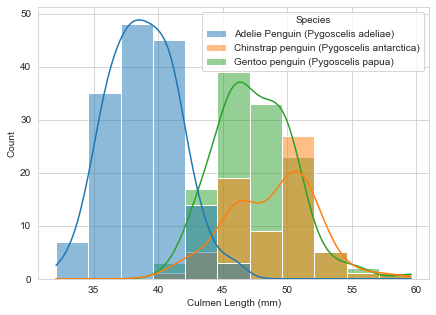

In [194]:
plt.figure(figsize=(7,5))
sns.histplot(x='Culmen Length (mm)', hue="Species", data=df, kde=True)
plt.show()

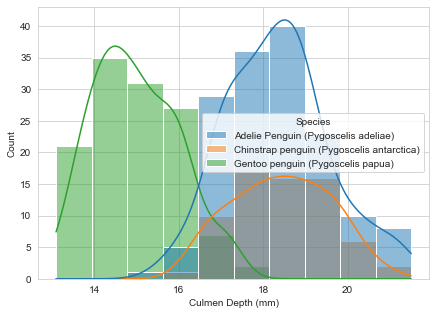

In [195]:
plt.figure(figsize=(7,5))
sns.histplot(x='Culmen Depth (mm)', hue="Species", data=df, kde=True)
plt.show()

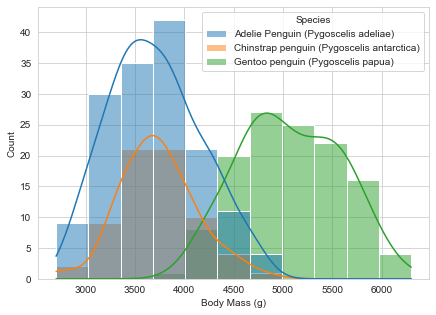

In [196]:
plt.figure(figsize=(7,5))
sns.histplot(x='Body Mass (g)', hue="Species", data=df, kde=True)
plt.show()

## bar graph

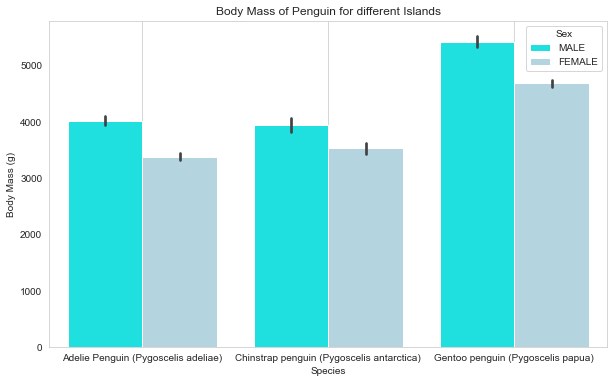

In [197]:
plt.figure(figsize=(10,6))
colors = ['Cyan', 'lightblue', 'darkblue']
sns.barplot(x=df['Species'], y=df['Body Mass (g)'], hue=df['Sex'], palette=colors)
plt.title("Body Mass of Penguin for different Islands")
plt.grid()
plt.show()

**Observation**
* There is high number of male penguin population in all the three species.

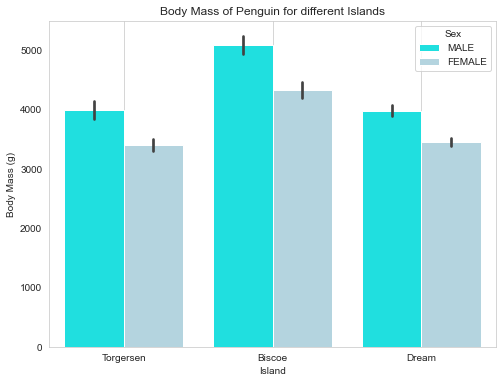

In [198]:
plt.figure(figsize=(8,6))
colors = ['Cyan', 'lightblue', 'darkblue']
sns.barplot(x=df['Island'], y=df['Body Mass (g)'], hue=df['Sex'], palette=colors)
plt.title("Body Mass of Penguin for different Islands")
plt.grid()
plt.show()

**Observation**
* Biscoe island has penguin with heavier Body Mass.

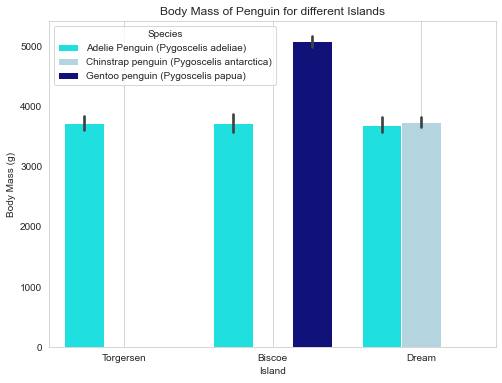

In [199]:
plt.figure(figsize=(8,6))
colors = ['Cyan', 'lightblue', 'darkblue']
sns.barplot(x=df['Island'], y=df['Body Mass (g)'], hue=df['Species'], palette=colors)
plt.title("Body Mass of Penguin for different Islands")
plt.grid()
plt.show()

**Observation**
* Torgersen island has only one species, Adelie penguin
* Biscoe Island has two species viz. Chinstrap and Gentoo Penguin 
* Dream island has two species with similar body mass.

### Count Plot
It is used for only categorical data. It plots the count of observations by category in the form of a bar plt.

In [200]:
df['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            123
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

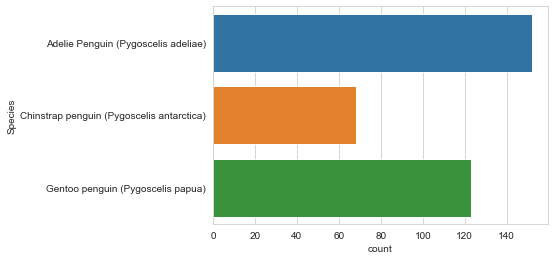

In [201]:
sns.countplot(y=df['Species'])
plt.show()

In [202]:
df['Sex'].value_counts()

MALE      178
FEMALE    165
Name: Sex, dtype: int64

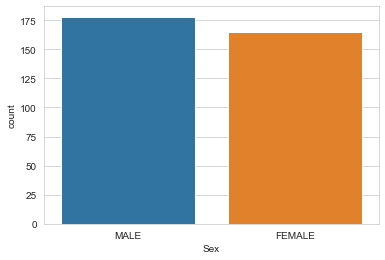

In [203]:
sns.countplot(x=df['Sex'])
plt.show()

## Box Plot
used for visualizing the outliers, median, quartiles.

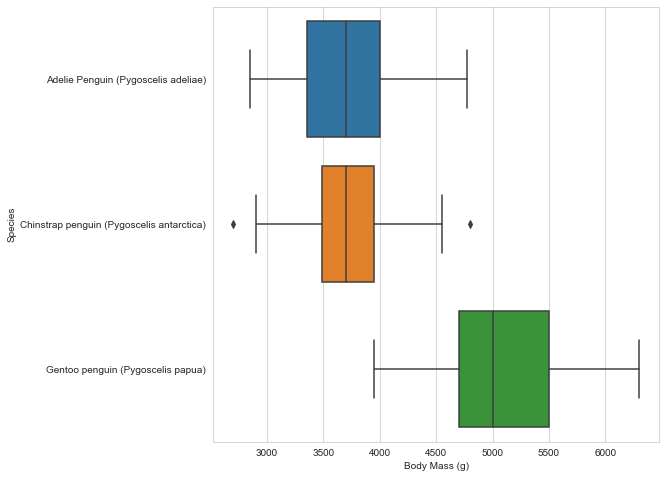

In [204]:
plt.figure(figsize=(8,8))
sns.boxplot(y="Species", x="Body Mass (g)", data=df)
plt.show()

Chinstrap Penguin has some outliers with respect to body mass.

### Violin Plot
Violin plots have common properties with box plots and used when the objective is to observer the distribution of numerical data for different categories.
Its difference from a box plot is that it depicts the **probability density** of the dataset. It gives more insights than a box plot, because two different categories might have the same mean but their distributions might differ.

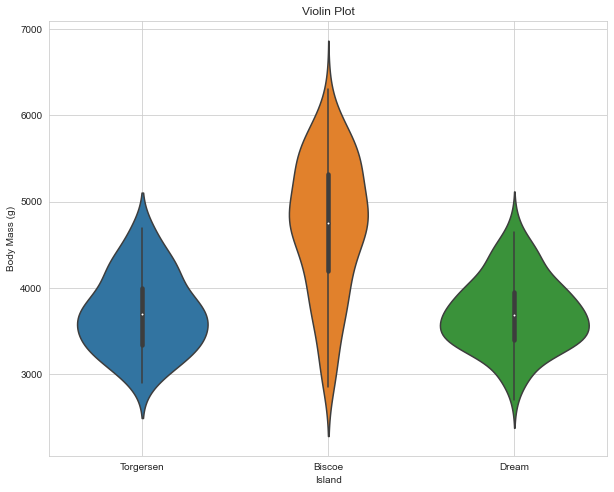

In [205]:
plt.figure(figsize=(10,8))
sns.violinplot(x=df['Island'], y=df['Body Mass (g)'])
plt.title("Violin Plot")
plt.grid(True)
plt.show()

In violin plot above, the mean of the body of the penguins are clustered between 3000 adn 4000 g in Dream island, whereas in Biscoe island the mean is between approximately 4500 and 5500g and so on.

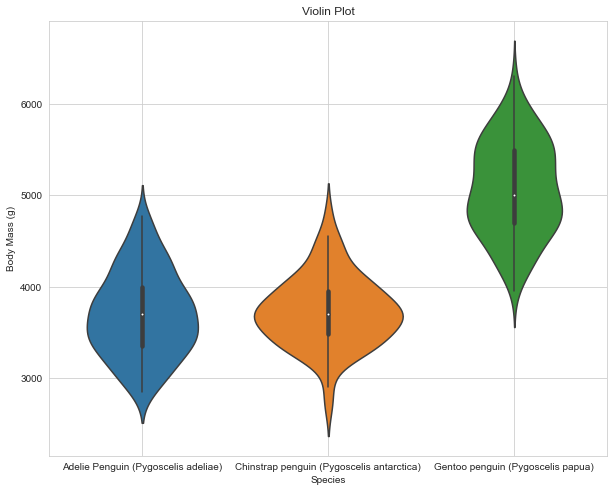

In [206]:
plt.figure(figsize=(10,8))
sns.violinplot(x=df['Species'], y=df['Body Mass (g)'])
plt.title("Violin Plot")
plt.grid(True)
plt.show()

**Observation**
* Adelie Penguin has mean mass distribution over 3000g and 4200g, Chinstrap Penguin has over 3200g and 4200g, and Gentoo Penguin over 4500g and 5800g.

## Calculation of mean and quartiles

In [207]:
adelie = df[df['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
chinstrap = df[df['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)']
gentoo = df[df['Species'] == 'Gentoo penguin (Pygoscelis papua)']

In [208]:
# Median
print("Medians:")
print(np.mean(adelie['Body Mass (g)']))
print(np.mean(chinstrap['Body Mass (g)']))
print(np.mean(gentoo['Body Mass (g)']))

print()

print("Quantiles:")
print(np.percentile(adelie['Body Mass (g)'], np.arange(25,100,25)))
print(np.percentile(chinstrap['Body Mass (g)'], np.arange(25,100,25)))
print(np.percentile(gentoo['Body Mass (g)'], np.arange(25,100,25)))

Medians:
3703.9459214384933
3733.0882352941176
5070.526667143504

Quantiles:
[3350. 3700. 4000.]
[3487.5 3700.  3950. ]
[4700. 5000. 5500.]


From both mean and median, we find Gentoo Penguin are the heaviest with median value 5000g.

## Correlation Matrix
This matrix shows the correlation between features.

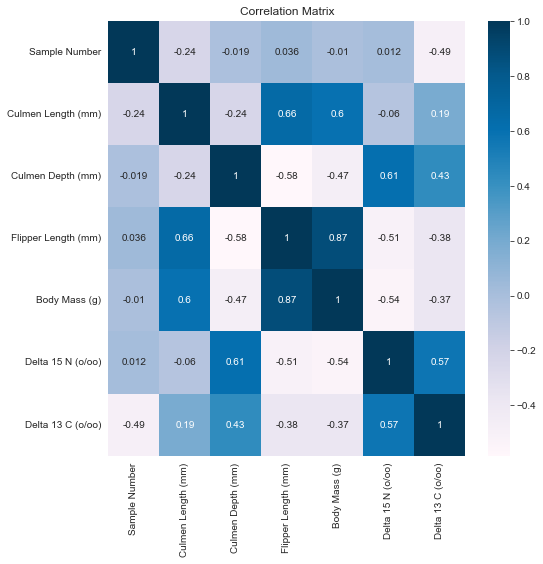

In [209]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap="PuBu")
plt.title("Correlation Matrix")
plt.show()

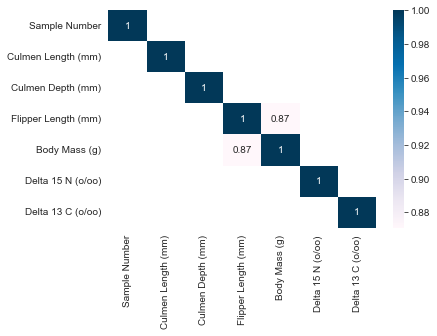

In [210]:
# correlation more than 0.8 are shown only.
sns.heatmap(corr[(corr > 0.8)], annot=True, cmap="PuBu")
plt.show()

Flipper Length and Body Mass features are positively correlated with value 0.87.

## Pairplot 
Pairplot is used for data visualization in 2D space, it is very useful plot for visualizing data in 2D space with dimension lesser dimension (say up to 5 or 6) for higher dimension of data pairplot is useless.

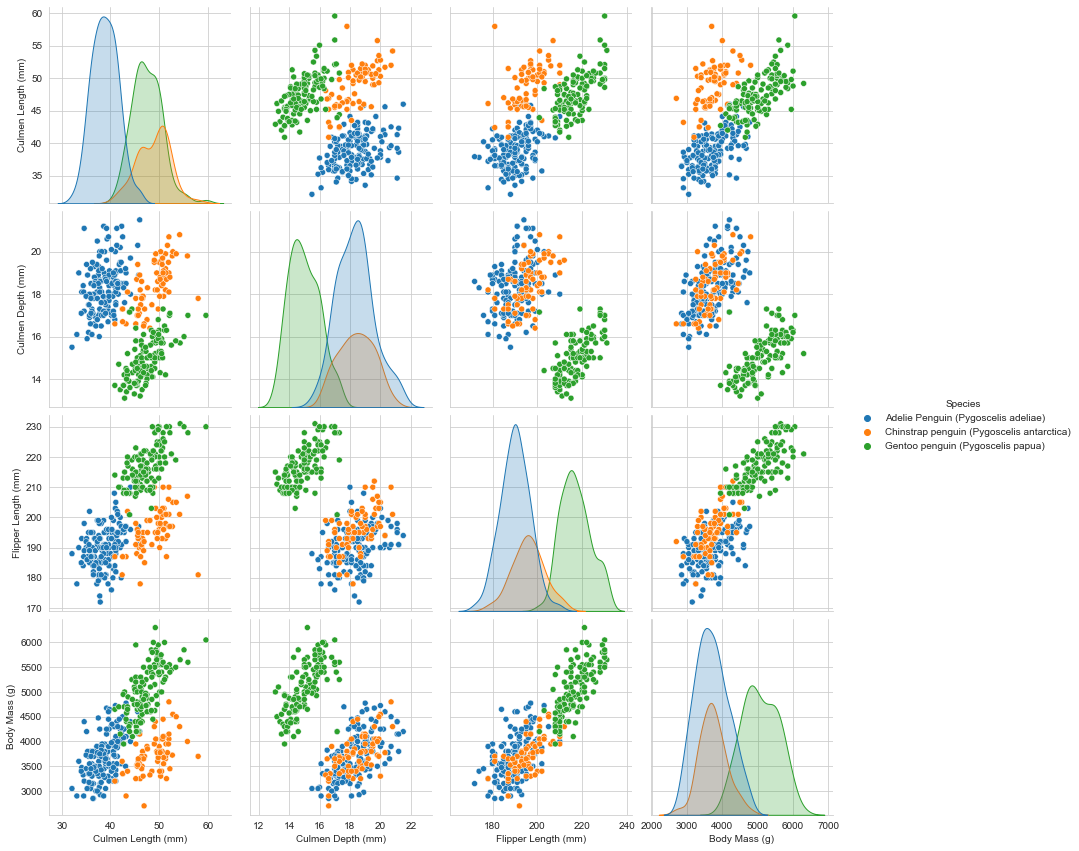

In [211]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Species",vars = ["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)", "Body Mass (g)"], height = 3)
plt.show()

**Observation:**
* with ['Culmen Depth (mm)' and 'Flipper Length (mm)'] and ['Culmen Depth (mm)' and 'Body Mass (g)'] we can seperate Gentoo penguin (Pygoscelis papua) from rest of two species. Meanwhile, Adelie Penguin (Pygoscelis adeliae) and Chinstrap penguin (Pygoscelis antarctica) are overlapped.
* scatter plot of 'Flipper Length (mm)' and 'Culmen Length (mm)' have formed some form of clustering of the species, with an account of some error we can classify species with this two features.

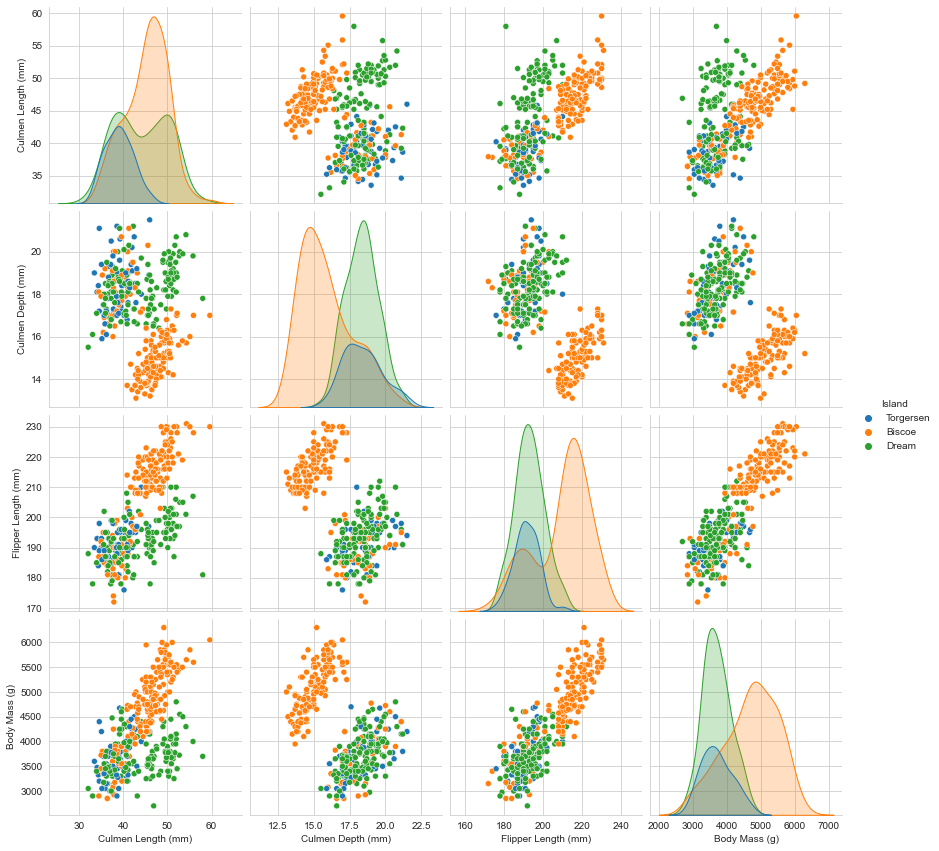

In [212]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Island",vars = ["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)", "Body Mass (g)"], height = 3)
plt.show()

**Observations:**
* The data/features are highly scattered/overlapped so we are not able to perform classification based on Island.

## Conclusions:
* There are higher number of Male penguin population
* Population of Adelie Penguin (Pygoscelis adeliae) is highest and Chinstrap penguin (Pygoscelis antarctica) is lowest.
* Gentoo penguin (Pygoscelis papua) are heavier among three species.
* Torgersen island has only one species, Adelie penguin, Biscoe Island has two species viz. Chinstrap and Gentoo Penguin
     and Dream island has two species.
* For developing ML model for species classification: "Culmen Length (mm)", "Flipper Length (mm)" features can be taken, with an account of the some percentage of error.
* For island classification, we are not able to develop ML model because all the features values are overlapped to each other.